# **UTS DATA MINING**
## Nama : Adhwa Pranaja Widyadana  
## NPM : 2310631170061  
## Kelas : 5A Informatika   

## **Data Profiling (Used Car Price Prediction)**

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
#mengupload api key
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adhwapranajaw","key":"15394e6547f66b04d8de784885329a6f"}'}

In [3]:
# Membuat direktori untuk menyimpan API Kaggle format JSON
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

# Mengunduh dataset dari Kaggle
!kaggle datasets download -d avikasliwal/used-cars-price-prediction

# Ekstrak file dataset
!unzip /content/used-cars-price-prediction.zip

Dataset URL: https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction
License(s): other
  0% 0.00/172k [00:00<?, ?B/s]
100% 172k/172k [00:00<00:00, 354MB/s]
Archive:  /content/used-cars-price-prediction.zip
  inflating: test-data.csv           
  inflating: train-data.csv          


In [4]:
# Menyimpan ke dalam variabel dataset
df = pd.read_csv('train-data.csv')
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [5]:
# Menampilkan informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [6]:
# Menampilkan nilai statistika deskriptif setiap variabel dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,6019.0,3009.000000,1737.679967,0.00,1504.5,3009.00,4513.50,6018.0
Year,6019.0,2013.358199,3.269742,1998.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.0,53000.00,73000.00,6500000.0
Seats,5977.0,5.278735,0.808840,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


In [7]:
print("\nJumlah data duplikat:", df.duplicated().sum())
print("\nJumlah missing tiap kolom:")
print(df.isna().sum())


Jumlah data duplikat: 0

Jumlah missing tiap kolom:
Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64


## **EDA (Exploratory Data Analysis)**

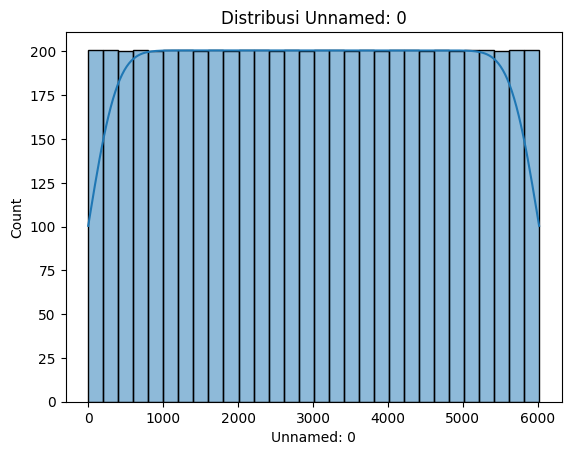

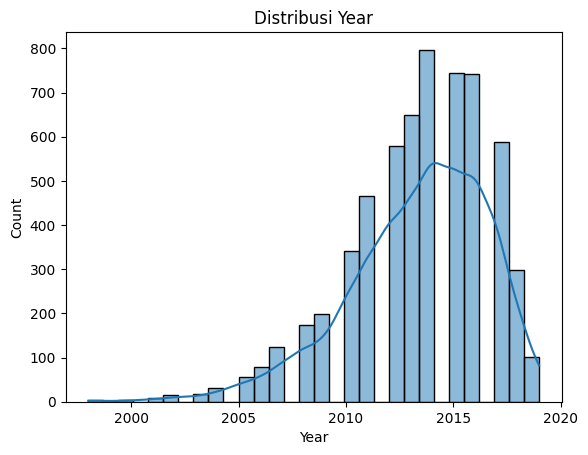

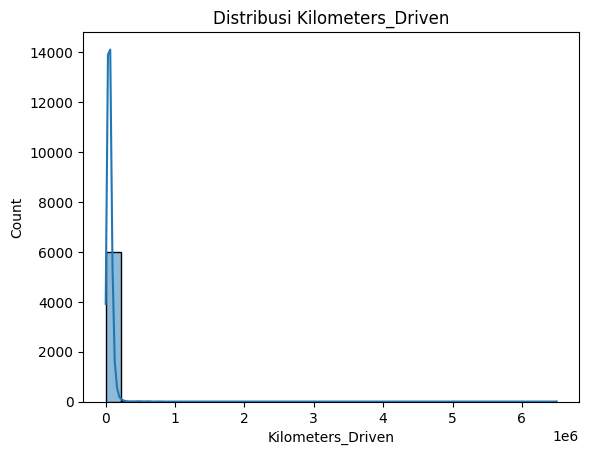

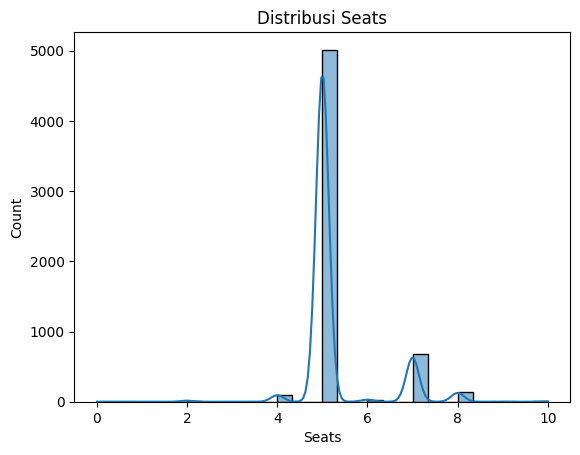

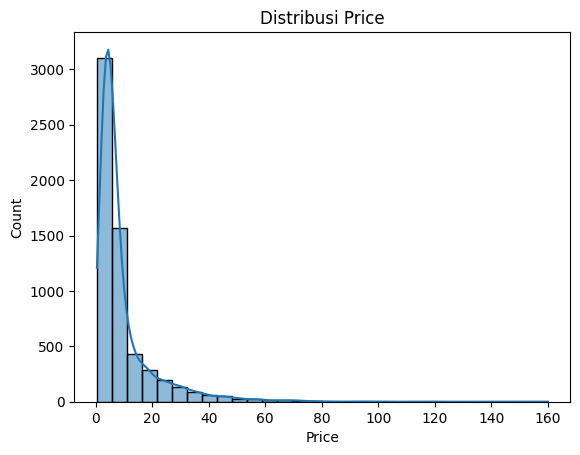

In [8]:
# Distribusi kolom numerik
num_cols = df.select_dtypes(include=[np.number]).columns
for col in num_cols[:5]:
    plt.figure()
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribusi {col}")
    plt.show()

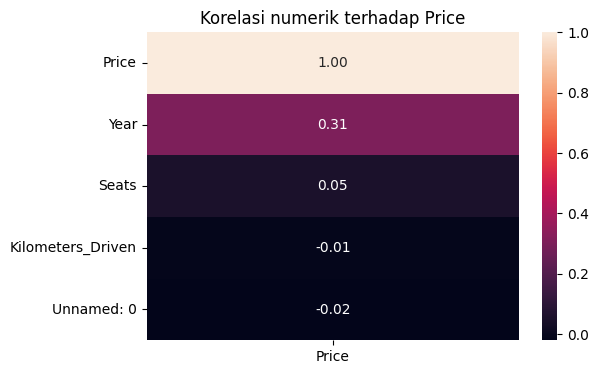

In [9]:
# Korelasi terhadap Harga
corr = df.corr(numeric_only=True)
plt.figure(figsize=(6,4))
sns.heatmap(corr[['Price']].sort_values(by='Price', ascending=False), annot=True, fmt='.2f')
plt.title("Korelasi numerik terhadap Price")
plt.show()

Tahun pembuatan menjadi faktor yang sangat berkolerasi dengan harga bekasnya

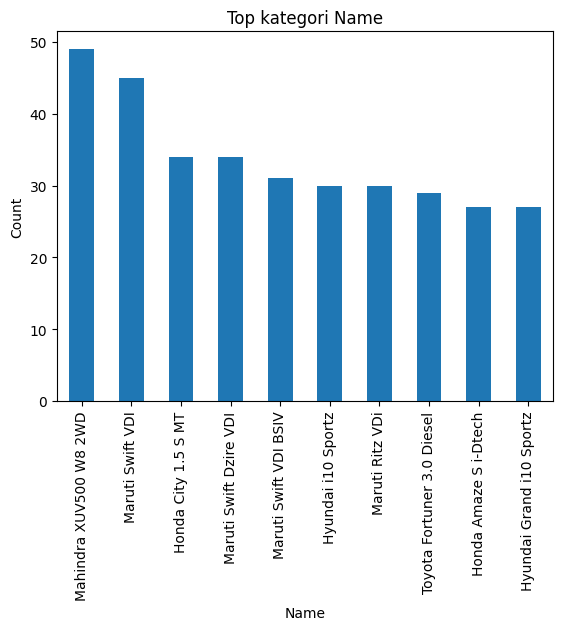

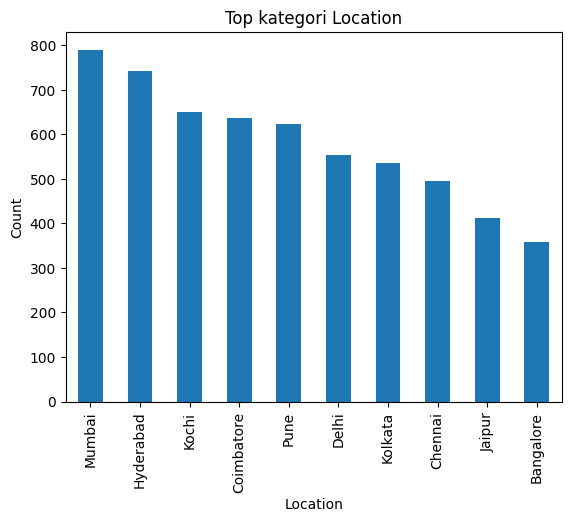

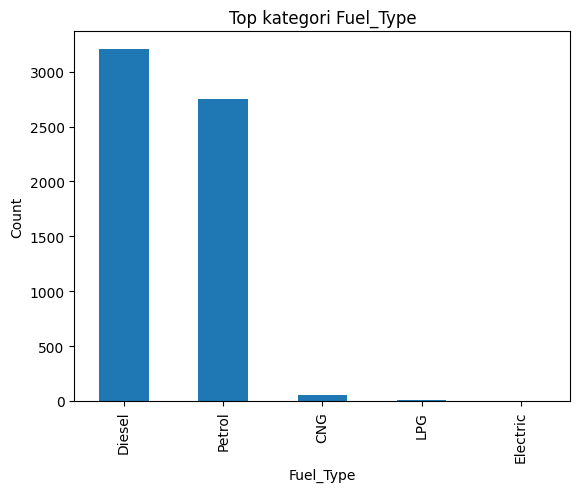

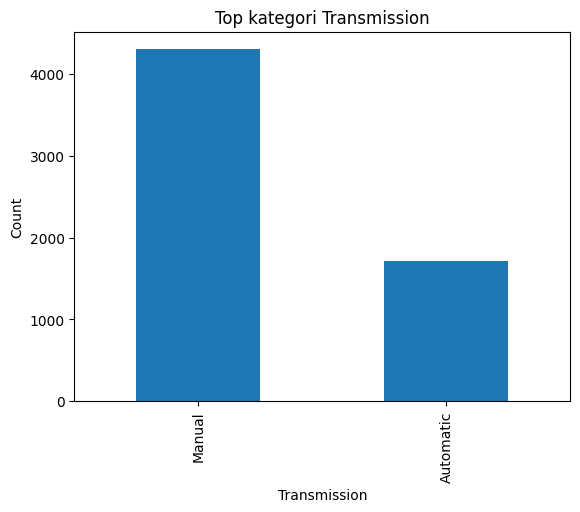

In [10]:
# Top kategori untuk kolom kategorik
cat_cols = df.select_dtypes(include=['object']).columns
for c in cat_cols[:4]:
    plt.figure()
    df[c].value_counts().head(10).plot(kind='bar')
    plt.title(f"Top kategori {c}")
    plt.ylabel("Count")
    plt.show()

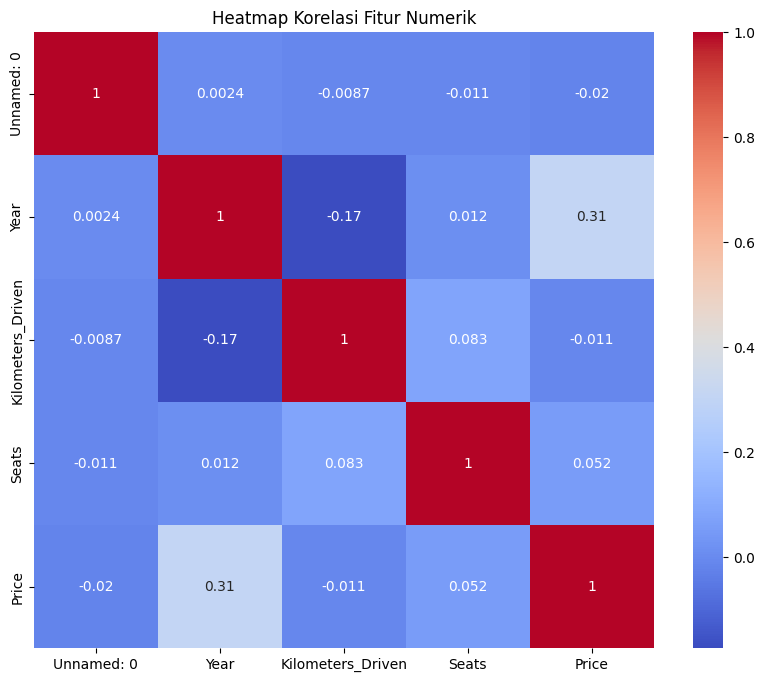

In [11]:
# Visualisasi korelasi antar fitur numerik dengan heatmap
plt.figure(figsize=(10, 8))
numeric_cols = df.select_dtypes(include=np.number)
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

## **Data Cleaning**

### **Remove Null Value**

In [12]:
# Buat salinan data untuk preprocessing
df_clean = df.copy()

In [13]:
# Mengubah kolom dengan satuan string menjadi numerik
def clean_numeric_any(series: pd.Series) -> pd.Series:
    if pd.api.types.is_numeric_dtype(series):
        return series.astype(float)
    s = series.astype(str).str.replace(",", ".", regex=False)
    extracted = s.str.extract(r"([0-9]+(?:\.[0-9]+)?)", expand=False)
    return pd.to_numeric(extracted, errors="coerce")

# Konversi kolom yang pakai satuan
for c in ["Mileage", "Engine", "Power", "New_Price"]:
    if c in df_clean.columns:
        df_clean[c] = clean_numeric_any(df_clean[c])

# Imputasi missing
for c in df_clean.columns:
    if pd.api.types.is_numeric_dtype(df_clean[c]):
        df_clean[c] = df_clean[c].fillna(df_clean[c].median())
    else:
        if df_clean[c].isna().any():
            mode_val = df_clean[c].mode(dropna=True)
            df_clean[c] = df_clean[c].fillna(mode_val.iloc[0] if not mode_val.empty else "Unknown")

print("Jumlah missing setelah imputasi:")
print(df_clean.isna().sum())

Jumlah missing setelah imputasi:
Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64


mengubah data yang berbentuk satuan menjadi numeric dan mengisi kolom yang kosong dengan median

In [14]:
df_clean.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,11.415,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,11.415,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.610,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.415,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,11.415,17.74


### **Remove Duplicate Value**

In [15]:
# Cek duplikasi dataset
df_clean.duplicated().sum()

np.int64(0)

**Karena dataset Used Car Price Prediction tidak memiliki duplikasi data, langsung saja ke tahap berikutnya**

### **Remove Column ID**

In [16]:
df_clean = df_clean.drop(columns=['Unnamed: 0', 'id', 'ID'], errors='ignore')

### **Remove Outliers**

In [17]:
# Buat salinan data untuk menghapus outliers
df_outlier = df_clean.copy()

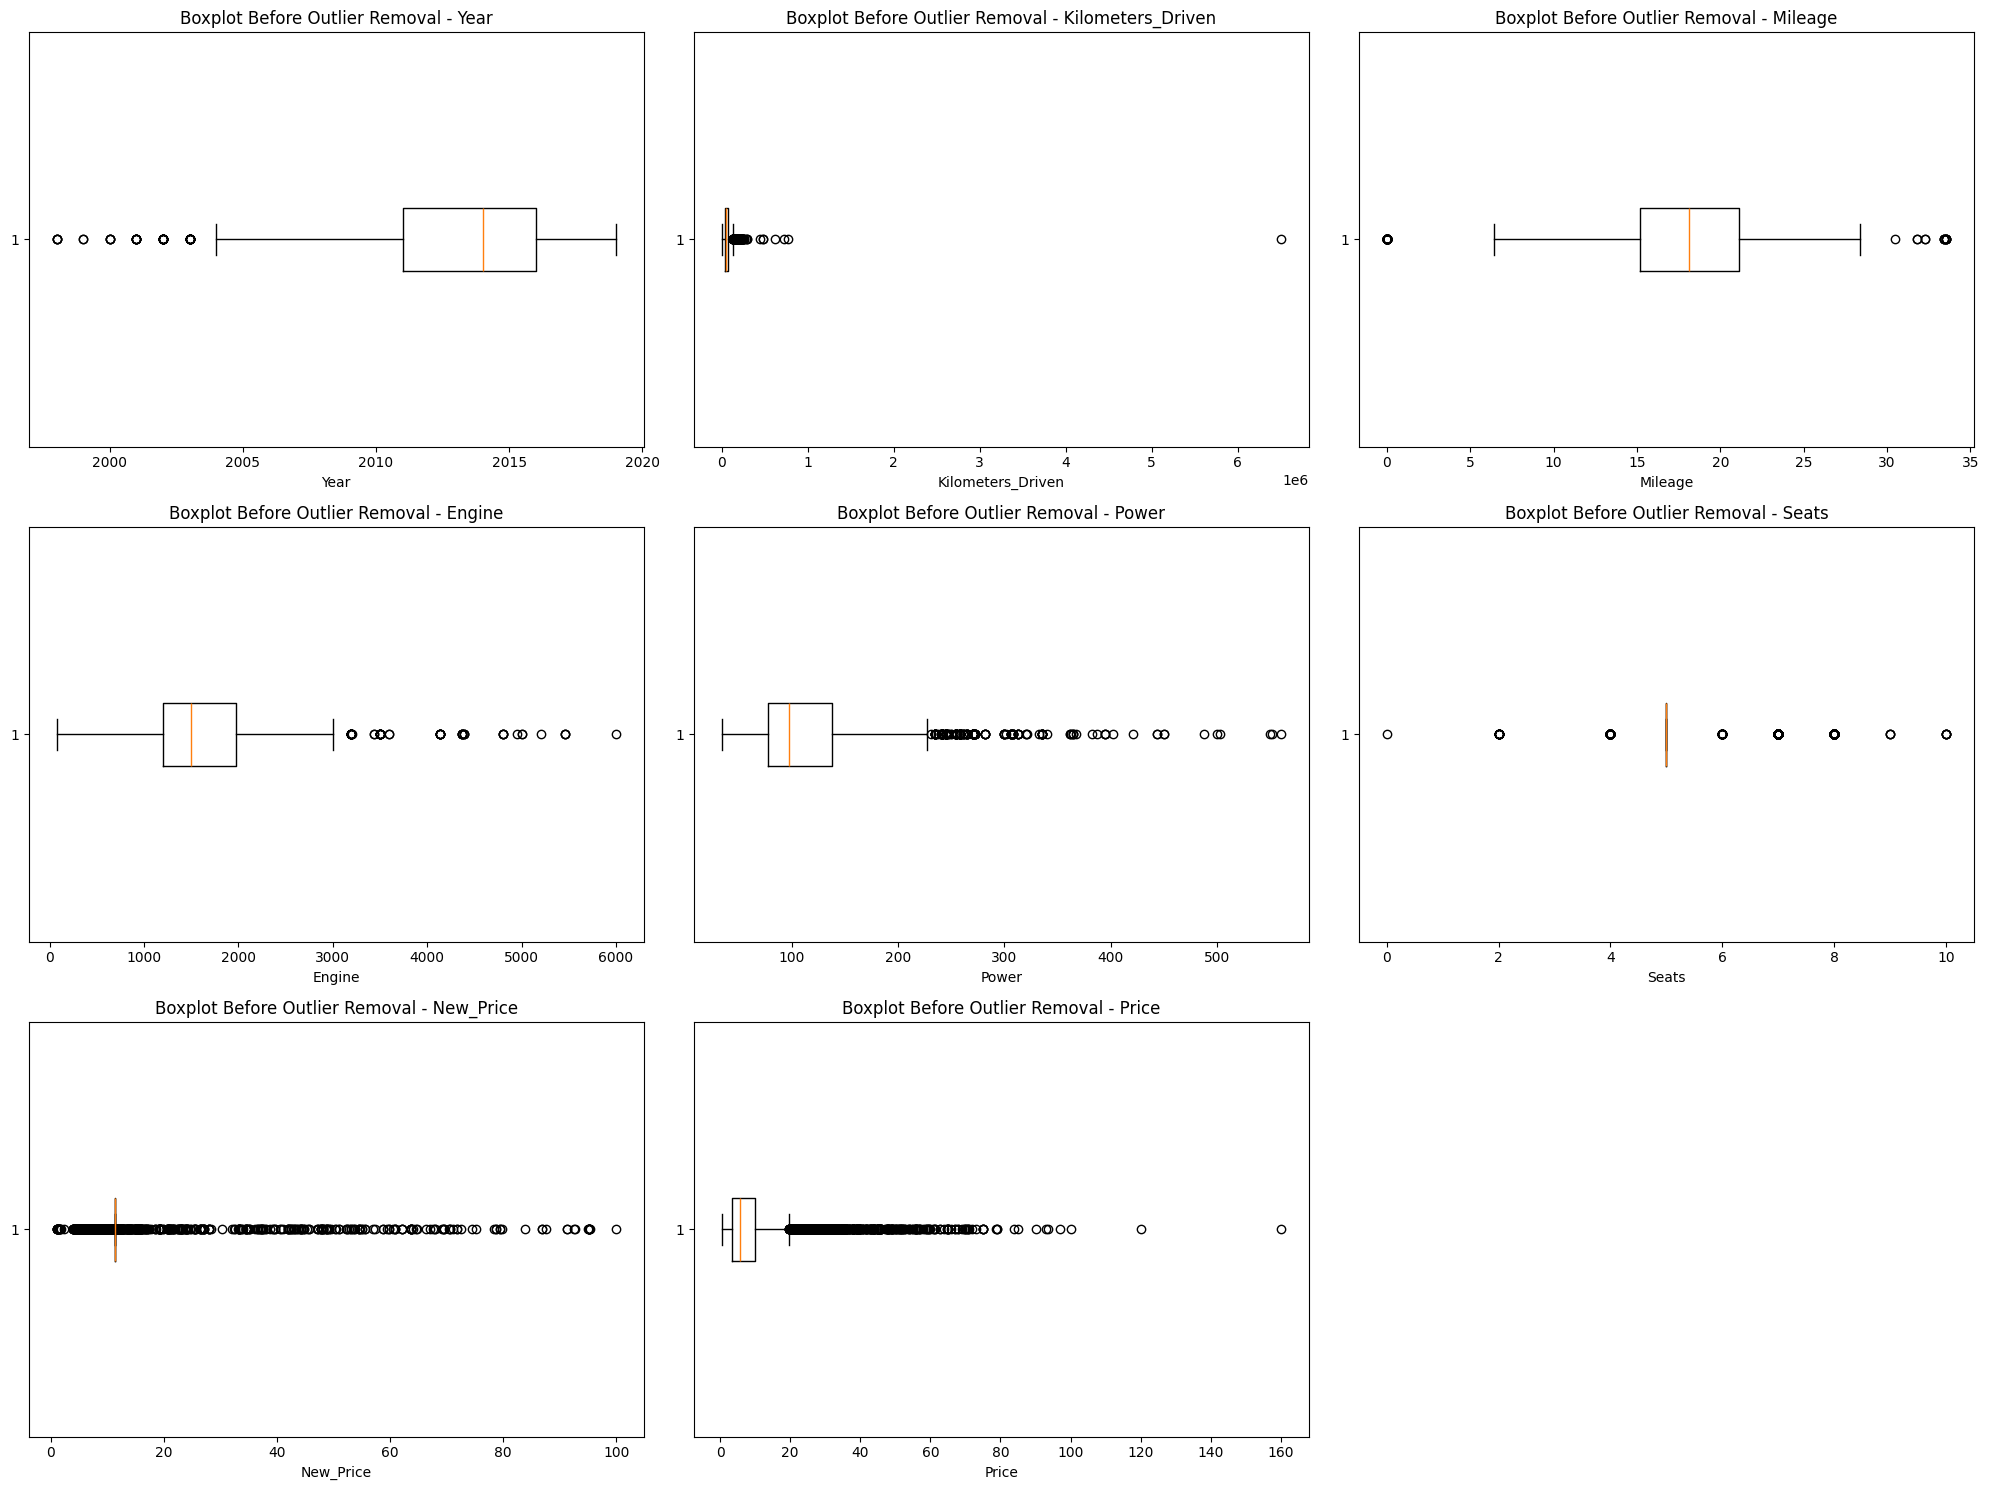

In [18]:
# Cek boxplot sebelum diatasi outliernya
num_cols = df_outlier.select_dtypes(include=np.number).columns

n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].boxplot(df_outlier[col], vert=False)
    axes[i].set_title(f'Boxplot Before Outlier Removal - {col}')
    axes[i].set_xlabel(col)

# Hapus axes kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [19]:
# Hapus outlier dari semua kolom numerik
def remove_outliers_iqr(df, columns):
  df_no_outlier = df_clean.copy()

  Q1 = df_no_outlier[columns].quantile(0.25)
  Q3 = df_no_outlier[columns].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR

  outlier_filters = ~((df_no_outlier[columns] < lower) | (df_no_outlier[columns] > upper)).any(axis=1)
  df_no_outlier = df_no_outlier[outlier_filters]
  return df_no_outlier

df_no_outlier = remove_outliers_iqr(df_outlier, num_cols)

print("Jumlah data sebelum hapus outlier: ", len(df_outlier))
print("Jumlah data setelah hapus outlier: ", len(df_no_outlier))
print("Total data yang dihapus: ", len(df_outlier) - len(df_no_outlier))
print("Persentase data yang dihapus: ", round((len(df_outlier) - len(df_no_outlier)) / len(df_outlier) * 100, 2), "%")

Jumlah data sebelum hapus outlier:  6019
Jumlah data setelah hapus outlier:  3769
Total data yang dihapus:  2250
Persentase data yang dihapus:  37.38 %


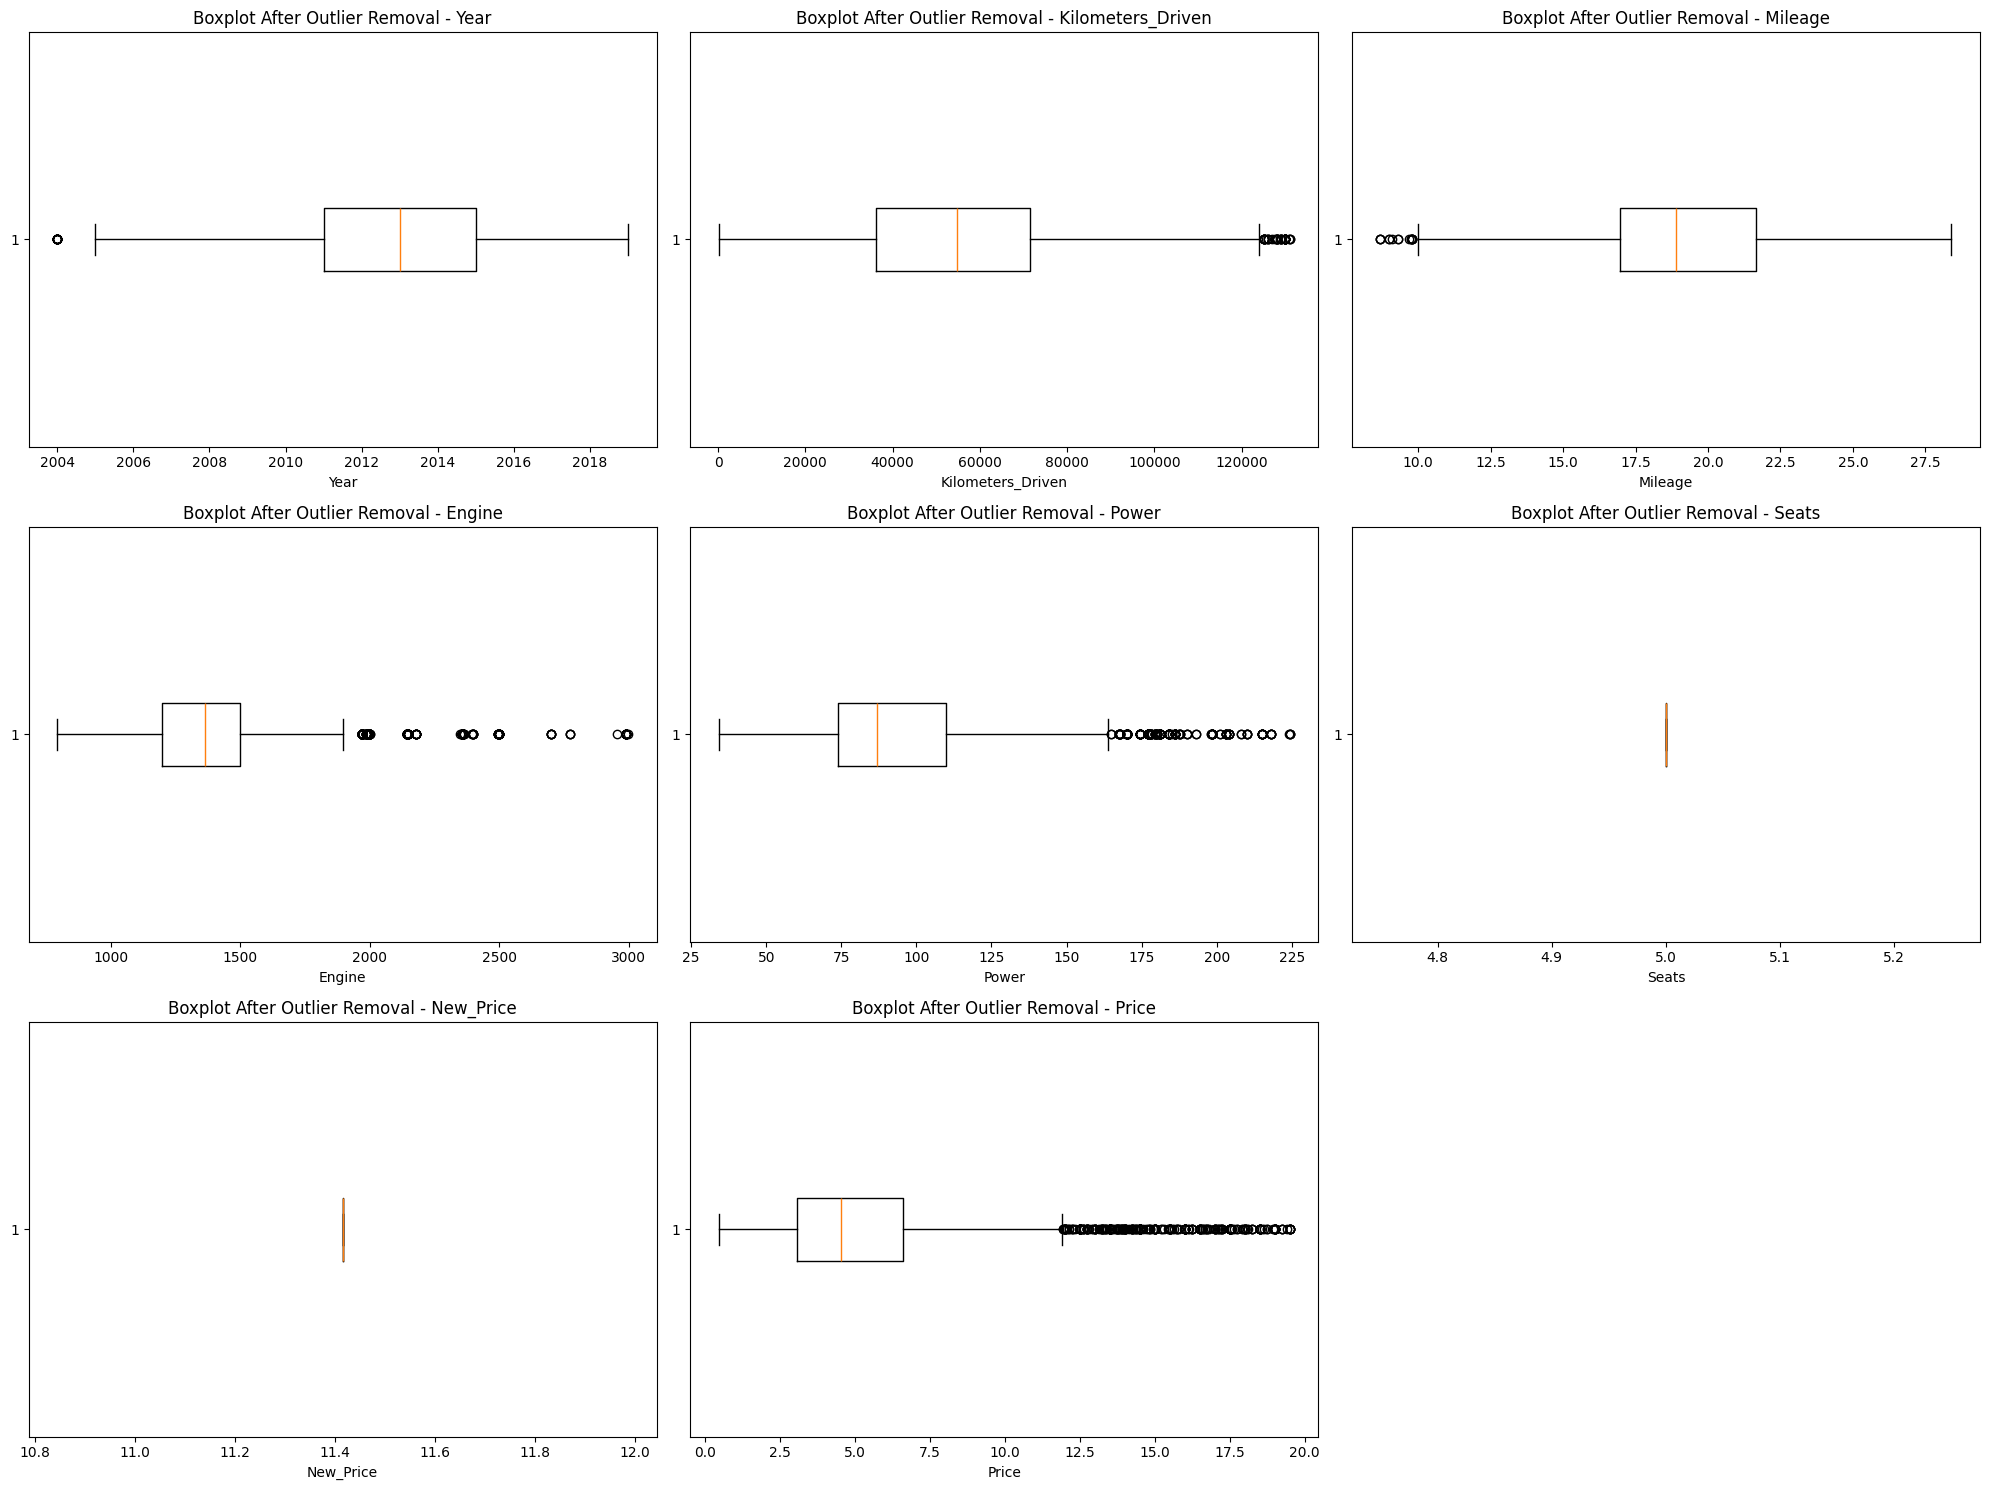

In [20]:
# Cek boxplot setelah diatasi outliernya
num_cols = df_no_outlier.select_dtypes(include=np.number).columns

n_cols = 3
n_rows = (len(num_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    axes[i].boxplot(df_no_outlier[col], vert=False)
    axes[i].set_title(f'Boxplot After Outlier Removal - {col}')
    axes[i].set_xlabel(col)

# Hapus axes kosong
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## **Feature Selection**

### **Menentukan Target dan Fitur**

In [21]:
y = df_no_outlier["Price"]
X = df_no_outlier.drop(columns=["Price", "Name", "New_Price"], errors="ignore")

num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(include=["object"]).columns.tolist()

print("Numerik:", num_cols)
print("Kategorik:", cat_cols)

Numerik: ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
Kategorik: ['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']


### Split Data

In [22]:
X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train:", X_train_raw.shape, "Test:", X_test_raw.shape)

Train: (3015, 10) Test: (754, 10)


One Hot Encoding

In [55]:
X_train = pd.get_dummies(X_train_raw, columns=cat_cols, drop_first=True)
X_test  = pd.get_dummies(X_test_raw,  columns=cat_cols, drop_first=True)

X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

print("Setelah OHE:", X_train.shape, "Test:", X_test.shape)

Setelah OHE: (3015, 24) Test: (754, 24)


### **Variance Threshold (Filter Method)**

In [24]:
vt = VarianceThreshold(threshold=0.0)
X_train_vt = vt.fit_transform(X_train)
X_test_vt  = vt.transform(X_test)

cols_after_vt = X_train.columns[vt.get_support(indices=True)]
print("Fitur tersisa setelah VarianceThreshold:", len(cols_after_vt))

Fitur tersisa setelah VarianceThreshold: 23


## **Modelling**

### **Feature Scaling**

In [25]:
# scaling dengan standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_vt)
X_test_scaled  = scaler.transform(X_test_vt)


In [26]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

In [28]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"R2     : {r2:.4f}")
print(f"MAE    : {mae:.4f}")
print(f"MSE    : {mse:.4f}")
print(f"RMSE   : {rmse:.4f}")

R2     : 0.7254
MAE    : 1.2648
MSE    : 3.3022
RMSE   : 1.8172


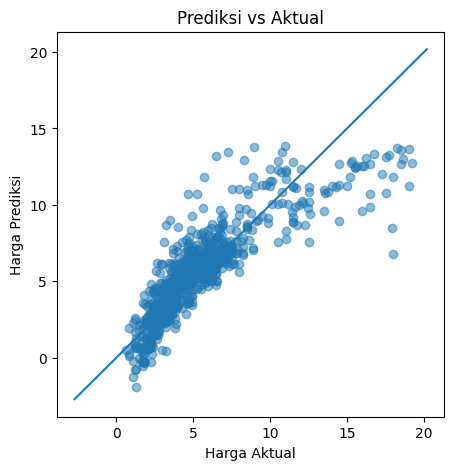

In [29]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Harga Aktual")
plt.ylabel("Harga Prediksi")
plt.title("Prediksi vs Aktual")
lims = [min(plt.xlim()[0], plt.ylim()[0]), max(plt.xlim()[1], plt.ylim()[1])]
plt.plot(lims, lims)
plt.show()

In [32]:
# Cek parameter model
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_)

Intercept: 5.509263681592035
Coefficient: [ 1.36270917e+00 -4.30016895e-01 -3.79326105e-01 -2.43234558e-01
  2.20313714e+00  5.08204581e-02 -7.39495412e-02  1.85675604e-01
 -1.57193586e-01  1.14658137e-01 -8.18048235e-02 -7.46411245e-02
 -4.41962817e-01 -2.76060192e-01 -1.15587429e-01  4.58925876e-01
  1.55783502e-01 -8.68682685e-04 -4.67982199e-01 -6.91930193e-01
 -1.75840371e-02 -6.74510855e-02 -5.53752024e-02]


### **Model Evaluation**

In [35]:
# Evaluasi model dengan metrik evaluasi regresi (R2, MAE, MSE, RMSE)
y_pred_test = lr.predict(X_test_scaled)

# Membuat dataframe untuk membandingkan nilai aktual dan prediksi
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})

# Mengurutkan index
comparison_df = comparison_df.sort_index()
# Mereset index
comparison_df = comparison_df.reset_index(drop=True)
# Tampilkan hasil
comparison_df

,Actual,Predicted
0,1.75,0.235765
1,8.25,6.692699
2,2.85,4.907574
3,2.75,3.081971
4,10.11,10.078843
...,...,...
749,8.00,11.038071
750,2.74,1.716569
751,2.27,0.795536
752,10.75,13.460905


## **Pengetesan Model**

### **Dengan file test_data.csv**

In [38]:
# Load data test
df_test = pd.read_csv("test-data.csv")

# Lihat isi
df_test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [39]:
# Copy dataset
df_test_clean = df_test.copy()

### **Data Cleaning**

In [40]:
# Mengubah kolom-kolom yang isinya satuan dalam string menjadi numerik
def clean_numeric(col):
    return col.astype(str).str.replace('[^\d.]', '', regex=True)

# Konversi kolom bersatuan
for c in ['Mileage', 'Engine', 'Power', 'New_Price']:
    if c in df_test_clean.columns:
        df_test_clean[c] = clean_numeric(df_test_clean[c])

# Isi missing values
for c in df_test_clean.columns:
    if pd.api.types.is_numeric_dtype(df_test_clean[c]):
        df_test_clean[c] = df_test_clean[c].fillna(df_test_clean[c].median())
    else:
        if df_test_clean[c].isna().any():
            mode_val = df_test_clean[c].mode(dropna=True)
            if not mode_val.empty:
                df_test_clean[c] = df_test_clean[c].fillna(mode_val.iloc[0])
            else:
                df_test_clean[c] = df_test_clean[c].fillna("Unknown")

<>:3: SyntaxWarning: invalid escape sequence '\d'
<>:3: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3213915830.py:3: SyntaxWarning: invalid escape sequence '\d'
  return col.astype(str).str.replace('[^\d.]', '', regex=True)


**Remove Colomn**

In [41]:
X_t = df_test_clean.drop(columns=["Price", "Name", "New_Price"], errors="ignore")

**One Hot Encoding**

In [42]:
X_t = pd.get_dummies(X_t, columns=cat_cols, drop_first=True)
X_t = X_t.reindex(columns=X_train.columns, fill_value=0)

### **Prediksi**

**Variance Threshold**

In [45]:
# Hapus string kosong dan ubah semua kolom ke numerik
_t = X_t.replace('', np.nan)
X_t = X_t.apply(pd.to_numeric, errors='coerce')
X_t = X_t.fillna(0.0)

# VarianceThreshold
X_t_vt  = vt.transform(X_t)

**Scaling**

In [52]:
# Memastikan hasil numerik murni
X_t_vt = np.asarray(X_t_vt, dtype=float)

# 13.5 Scaling
X_t_scaled = scaler.transform(X_t_vt)

**Hasil**

In [53]:
#Prediksi
y_t_pred = lr.predict(X_t_scaled)

# Gabungkan hasil prediksi ke dataframe asli
df_out = df_test_clean.copy()
df_out["Predicted_Price"] = y_t_pred

# Tampilkan hasil
df_out.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Predicted_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26,998,58.2,4.0,,2.253551
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796,47.3,5.0,,1.851298
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68,2393,147.8,7.0,25.27,11.249067
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59,1364,,5.0,,-1.711292
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5,1197,82.85,5.0,,4.127083
